<a href="https://colab.research.google.com/github/badrinarayanan02/Predictive-Analytics/blob/main/2348507_PALab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Regression Model for House Prediction

Predicting House Prices Using Regression

Loading the libraries

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Inference: This dataset does not contain any missing values.

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Scaling the features

In [7]:
X = df.drop('Target',axis=1)
y = df['Target']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Inference: For models like ridge and lasso scaling is necessary to ensure that all the features are in same range. Now the features are scaled.

# Exploratory Data Analysis

Exploring relationship between features and target variable

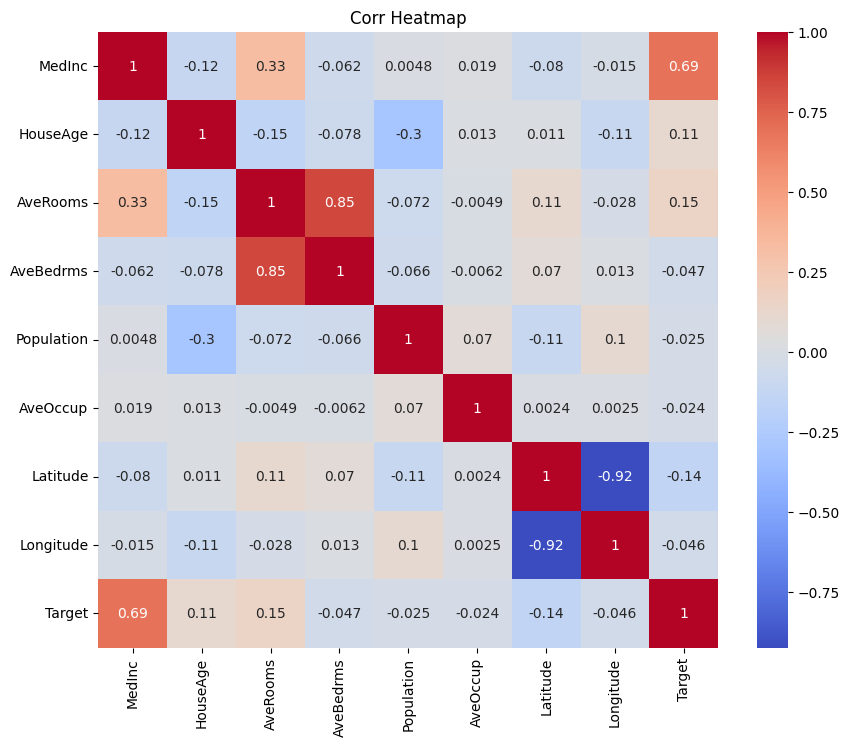

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Corr Heatmap')
plt.show()

Inference

Median Income has the strongest positive correlation (0.69) with the target variable. Income is the most important predictor.

AveRooms and AveBedrooms have weak correlation (0.15, -0.047) with the target.

**Potential Feature Importance (When comparing with target)**

MedInc (0.69)

AveRooms (0.15)

HouseAge (0.11)

AveBedrooms (-0.047)

Longitude (-0.046)

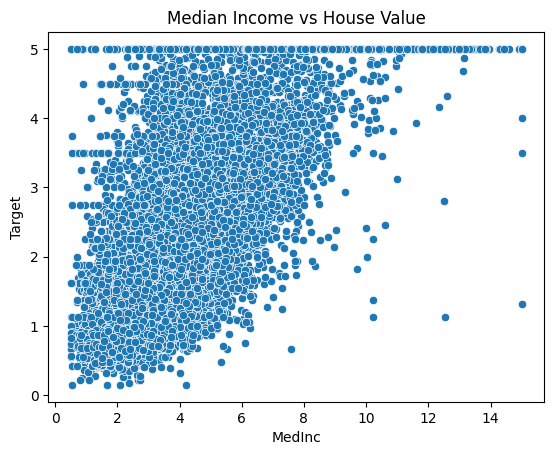

In [11]:
sns.scatterplot(x=df['MedInc'], y=df['Target'])
plt.title('Median Income vs House Value')
plt.show()

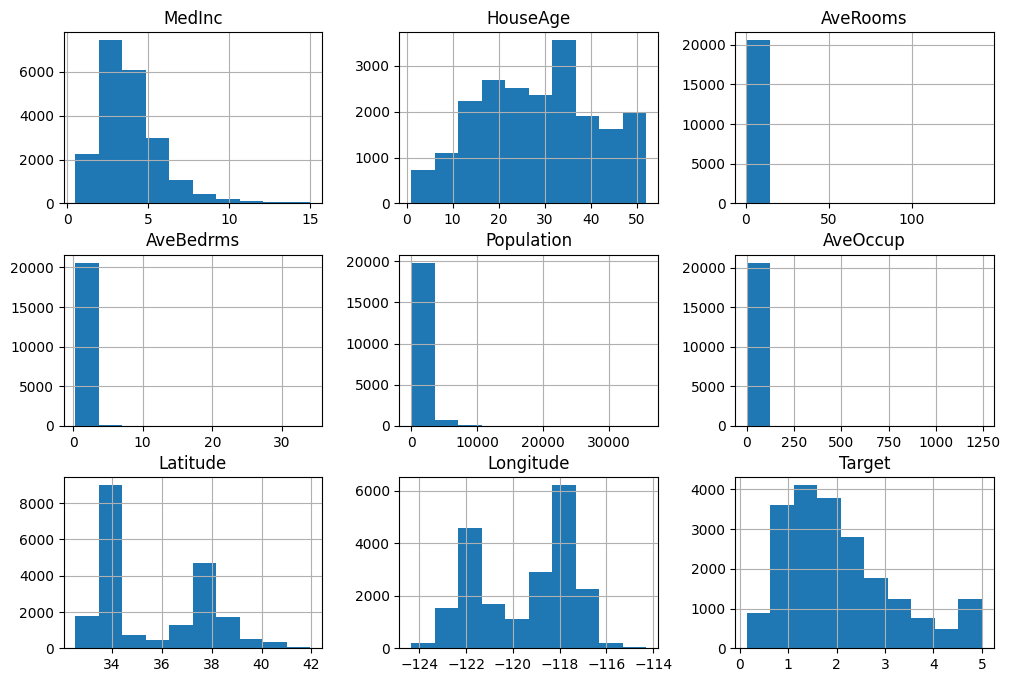

In [12]:
df.hist(figsize=(12,8))
plt.show()

# Model Building

Multiple Linear Regression: Standard Linear Regression without regularization

Ridge Regression: Linear regression with L2 regularization

Lasso Regression: Linear regression with L1 regularization

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_lr = linear.predict(X_test)

In [16]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)

In [17]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Hyperparameter Tuning

Performing cross validation to find the best hyperparameters

For Ridge, Lasso tuning the regularization strength (alpha)

In [20]:
ridge_params = {'alpha':[0.1,1,10,100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [22]:
lasso_params = {'alpha':[0.1,1,10,100]}
lasso_cv = GridSearchCV(Lasso(), ridge_params, cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [24]:
print(f"Best Alpha for Ridge: {ridge_cv.best_params_}")
print(f"Best Alpha for Lasso: {lasso_cv.best_params_}")

Best Alpha for Ridge: {'alpha': 0.1}
Best Alpha for Lasso: {'alpha': 0.1}


Inference: Got the best alpha value for both ridge and lasso

**Ridge VS Lasso**

In Ridge if we have 10 features and some of them are not very useful ridge will reduce their coefficients but won't eliminate them. We will end up with all the 10 features, but the less important will have smaller weights.

In Lasso, it might reduce the coefficients of the less important features to exactly zero, it will effective remove those features from the model. We might end up with 4-5 features that are most important.

# Evaluation

In [26]:
def evaluate(y_true, y_pred):
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  return rmse, r2, mae

Multiple Linear Regression

In [27]:
rmse_lr, r2_lr, mae_lr = evaluate(y_test, y_pred_lr)
print(f"Linear Regression: RMSE: {rmse_lr}, RSquare: {r2_lr}, MAE: {mae_lr}")

Linear Regression: RMSE: 0.7455813830127761, RSquare: 0.5757877060324511, MAE: 0.5332001304956565


Ridge Regression

In [28]:
rmse_ridge, r2_ridge, mae_ridge = evaluate(y_test, y_pred_rid)
print(f"Ridge Regression: RMSE: {rmse_ridge}, RSquare: {r2_ridge}, MAE: {mae_ridge}")

Ridge Regression: RMSE: 0.745554290938461, RSquare: 0.575818534544132, MAE: 0.5331933646313113


Lasso Regression

In [30]:
rmse_lasso, r2_lasso, mae_lasso = evaluate(y_test, y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso}, R²: {r2_lasso}, MAE: {mae_lasso}")

Lasso Regression - RMSE: 1.1448563543099792, R²: -0.00021908714592466794, MAE: 0.9060685490007149


Inference: Both multiple linear regression and ridge regression performed similarly. Lasso regression performed poorly, it over penalized the features reducing it's ability to fit the data well.

# Conclusion

Analyzed the california housing dataset, performed data preprocessing and EDA. Gathered great insights about the data. In model building phase, defined three models (Multiple Linear Regression, Ridge Regression, Lasso Regression), linear regression and ridge regression performed well by considering the evaluation metrics. Hyperparamter tuning is done, in order to find the best alpha value.